In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading dataset

In [2]:
train = pd.read_csv(r"C:\Users\jbnay\Downloads\train_loan.csv")

In [3]:
test = pd.read_csv(r"C:\Users\jbnay\Downloads\test_loan.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test.shape

(367, 12)

## 2. Preprocessing

In [8]:
# preprocessing on train data

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Missing value Handling

In [11]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

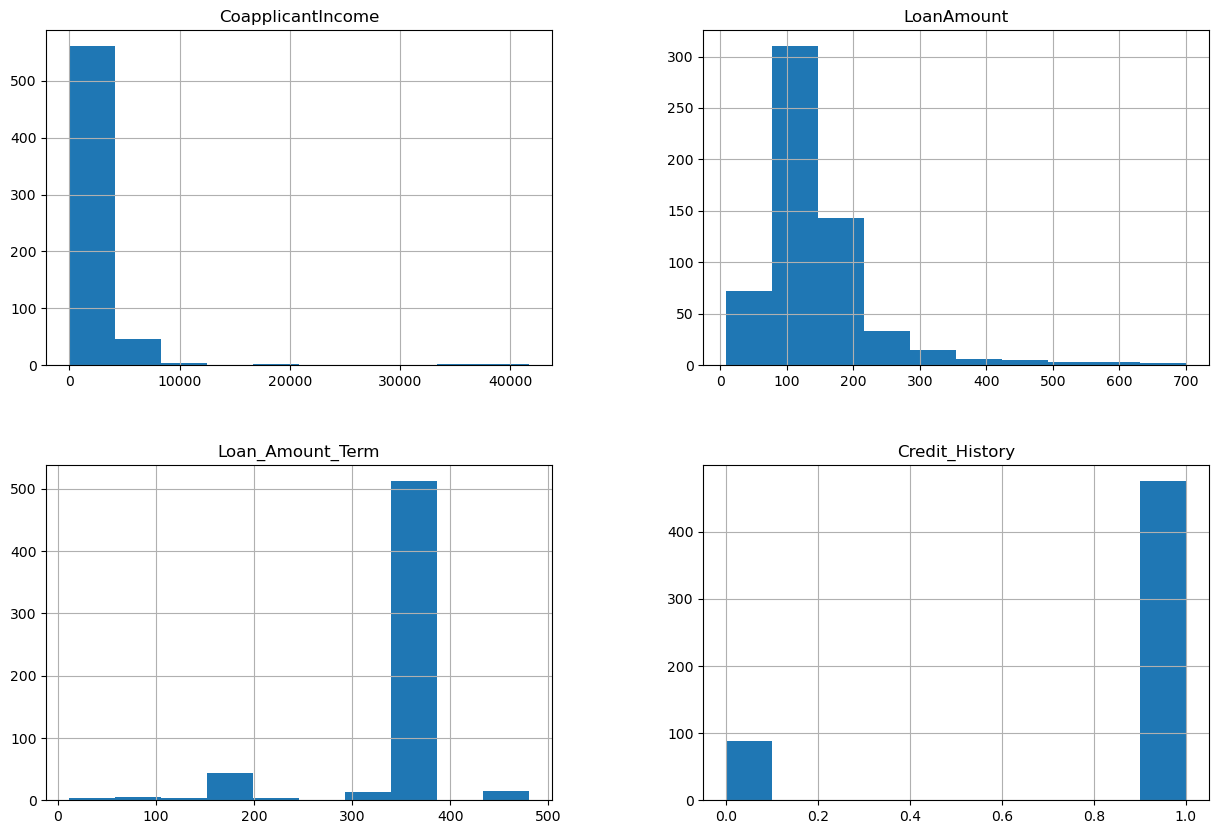

In [12]:
frequency_graph = train.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(15,10))
plt.show()

In [13]:
#numerical_values
train['LoanAmount'] = train['LoanAmount'].fillna( train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna( train['Loan_Amount_Term'].median())
train['Credit_History'] = train['Credit_History'].fillna( train['Credit_History'].median())

In [14]:
# categorical_data
train['Gender'] = train['Gender'].fillna( train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna( train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna( train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna( train['Self_Employed'].mode()[0])

In [15]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outlier detectio and Handling

In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
num_cols = [['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

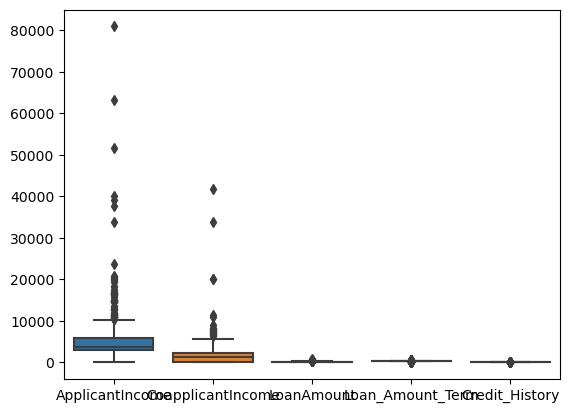

In [18]:
for i in num_cols:
   sns.boxplot(train[i])
   


In [19]:
#ApplicantIncome
q1 = train['ApplicantIncome'].quantile(.25)
q2 = train['ApplicantIncome'].quantile(.50)
q3 = train['ApplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2917.5


In [20]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [21]:
print(up_lim,low_lim)

10171.25 -1498.75


In [22]:
#outlier handling by capping

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [23]:
train['ApplicantIncome'] =train['ApplicantIncome'].apply(limit_imputer)

<Axes: >

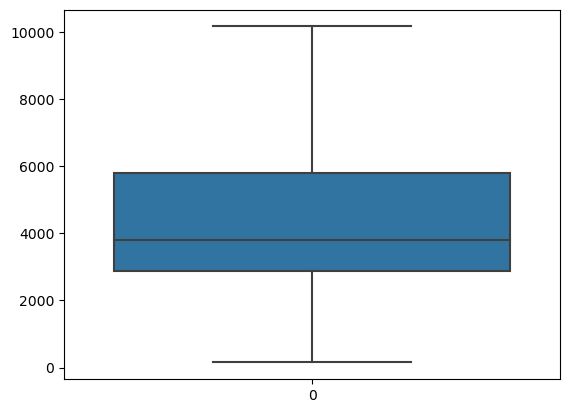

In [24]:
sns.boxplot(train['ApplicantIncome'])

In [25]:
train['ApplicantIncome'].describe()

count      614.000000
mean      4617.111564
std       2479.851729
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      10171.250000
Name: ApplicantIncome, dtype: float64

In [26]:
#CoapplicantIncome
q1 = train['CoapplicantIncome'].quantile(.25)
q2 = train['CoapplicantIncome'].quantile(.50)
q3 = train['CoapplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2297.25


In [27]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [28]:
print(up_lim,low_lim)

5743.125 -3445.875


In [29]:

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [30]:
train['CoapplicantIncome'] =train['CoapplicantIncome'].apply(limit_imputer)

In [31]:
#LoanAmount
q1 = train['LoanAmount'].quantile(.25)
q2 = train['LoanAmount'].quantile(.50)
q3 = train['LoanAmount'].quantile(.75)

iqr = q3-q1
print(iqr)

64.5


In [32]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

261.5 3.5


In [33]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [34]:
train['LoanAmount'] =train['LoanAmount'].apply(limit_imputer)

In [35]:
#dropping unncessary column
train.drop(['Loan_ID'],inplace = True,axis=1)

In [36]:
x = train.drop(['Loan_Status'],axis=1)

In [37]:
y = train['Loan_Status']

In [38]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


In [39]:
#Encoding

One-Hot Encoding

In [40]:
x = pd.get_dummies(x)

In [41]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [42]:
x.shape

(614, 20)

In [43]:
#Scaling

Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x[num_cols] = scaler.fit_transform(x[num_cols])

In [45]:
#preprocessing on test data

In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
test.shape

(367, 12)

In [48]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [50]:
# Missing value handling

test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

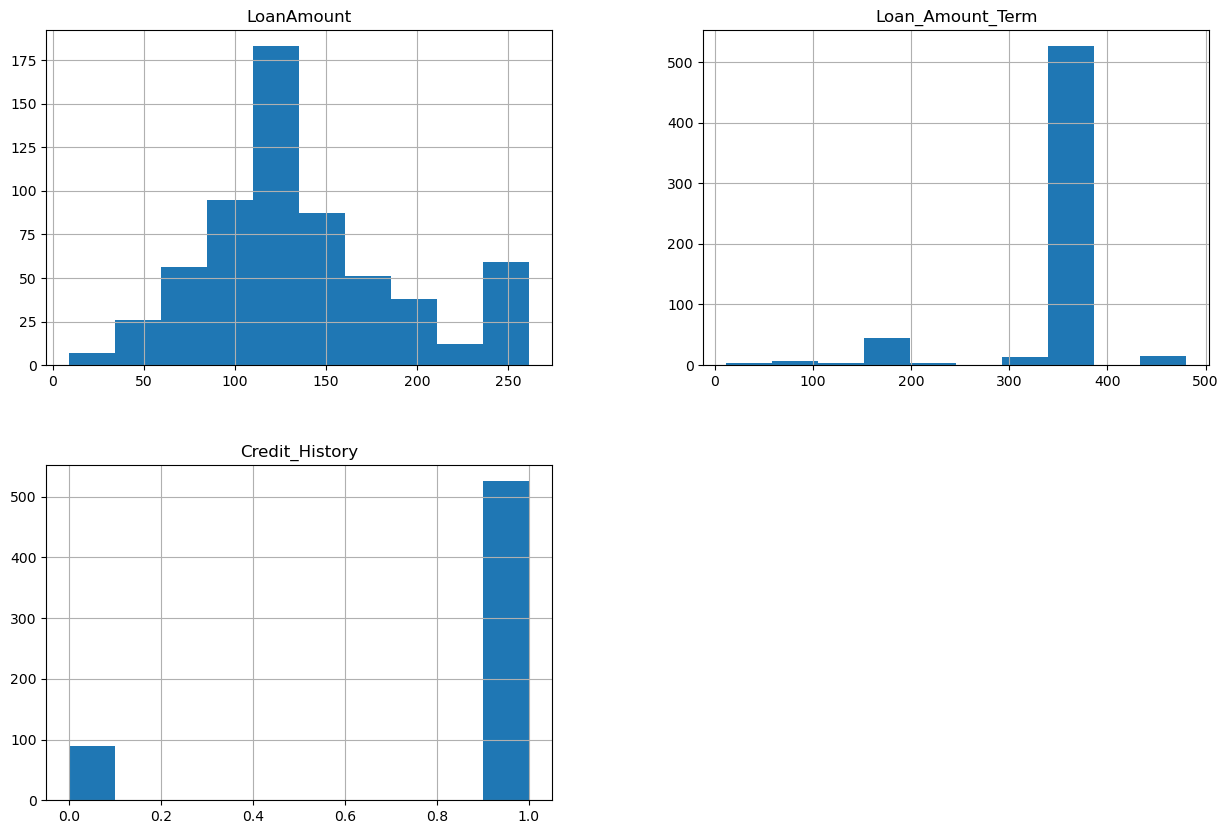

In [51]:
frequency_graph = train[['LoanAmount','Loan_Amount_Term','Credit_History']]
frequency_graph.hist(figsize=(15,10))
plt.show()

In [52]:
# categorical_data
test['Gender'] = test['Gender'].fillna( test['Gender'].mode()[0])
test['Dependents'] = test['Dependents'].fillna( test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].mode()[0])


In [53]:
#numerical_values
test['LoanAmount'] = test['LoanAmount'].fillna( test['LoanAmount'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna( test['Loan_Amount_Term'].median())
test['Credit_History'] = test['Credit_History'].fillna( test['Credit_History'].median())

In [54]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
# outlier detection and handling

In [56]:


test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [57]:
numerical = [['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

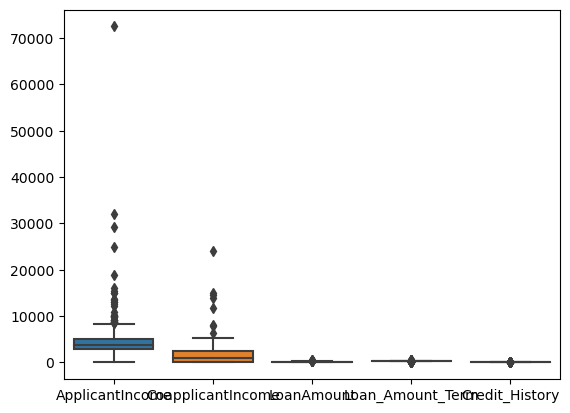

In [58]:
for i in numerical:
   sns.boxplot(test[i])
   

In [59]:
#ApplicantIncome
q1 = test['ApplicantIncome'].quantile(.25)
q2 = test['ApplicantIncome'].quantile(.50)
q3 = test['ApplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2196.0


In [60]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

8354.0 -430.0


In [61]:
#outlier handling by capping

def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [62]:
test['ApplicantIncome'] =test['ApplicantIncome'].apply(limit_imputer)

<Axes: >

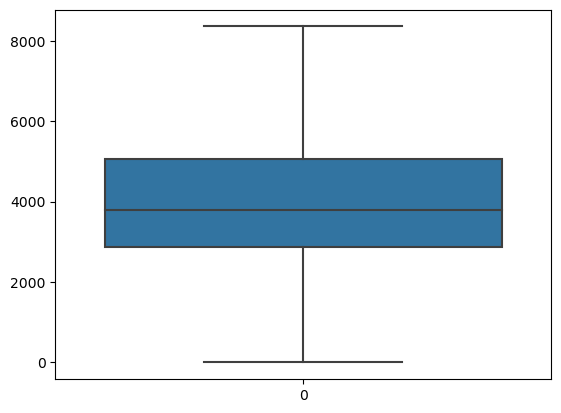

In [63]:
sns.boxplot(test['ApplicantIncome'])

In [64]:
test['ApplicantIncome'].describe()

count     367.000000
mean     4238.964578
std      1950.976357
min         0.000000
25%      2864.000000
50%      3786.000000
75%      5060.000000
max      8354.000000
Name: ApplicantIncome, dtype: float64

In [65]:
#CoapplicantIncome
q1 = test['CoapplicantIncome'].quantile(.25)
q2 = test['CoapplicantIncome'].quantile(.50)
q3 = test['CoapplicantIncome'].quantile(.75)

iqr = q3-q1
print(iqr)

2430.5


In [66]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

print(up_lim,low_lim)

6076.25 -3645.75


In [67]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [68]:
test['CoapplicantIncome'] =test['CoapplicantIncome'].apply(limit_imputer)

In [69]:
# dropping unnecessary column

test.drop(['Loan_ID'],inplace = True,axis=1)

In [70]:
# Encoding

One-Hot Encoding


In [71]:
test =pd.get_dummies(test)

In [72]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340.0,2546.0,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276.0,0.0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [73]:
test.shape

(367, 20)

In [74]:
#scaling

StandardScaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
test[num_cols] = scaler.fit_transform(test[num_cols])